# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [71]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

import pickle

df = pd.read_csv("../data/data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [72]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Should we deal with this?...

Look at some basic statistics for numerical variables.

In [73]:
# Look at which ones are numerical

df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [74]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)

> 564 have some, 50 don't.

2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?

> *ApplicantIncome*: why are they so low? Only a amx of $81,000? Mean of $5400? We'll see the distributions later

3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.

> Income definitely skewed (as we can see from the max value)



Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [75]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

 Recall that 'Incomes' and 'Amounts are numerical values ( so there will be more values)

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [76]:
#..I'll save this for the plots...

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



In [77]:

plot_df = df.drop(columns=['Loan_ID']) # If we drop this, we get a nice 4x3 subplot

col_names = plot_df.columns

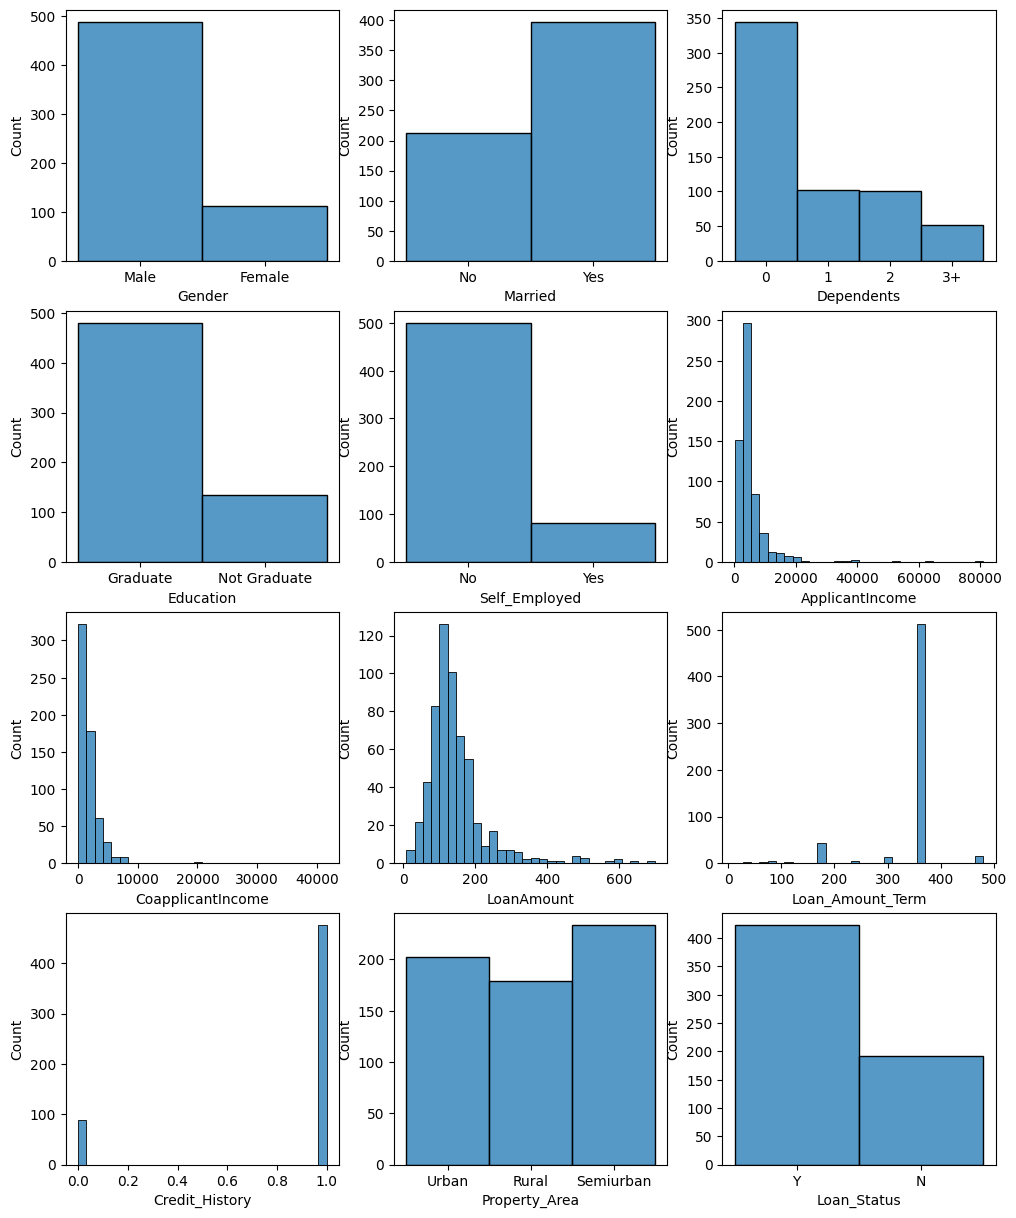

In [78]:
# Creating subplot axes

fig, axes = plt.subplots(4, 3, figsize=[12,15])

# Iterating through axes and names
for name, ax in zip(col_names, axes.flatten()):
    sns.histplot(x= name, data=plot_df,bins = 30, ax=ax)


Look at box plots to understand the distributions.


<AxesSubplot:>

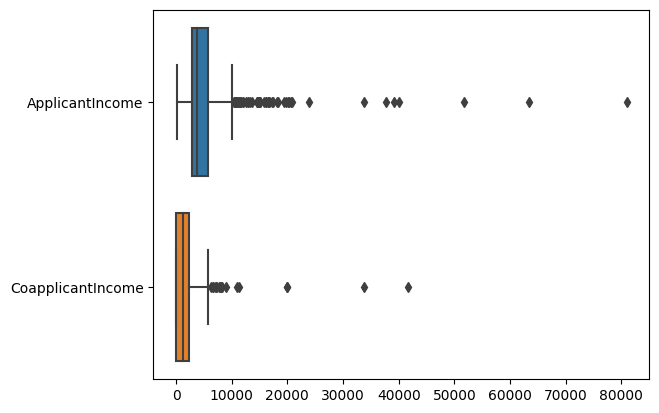

In [79]:
# Look at incomes only
sns.boxplot(data = plot_df[['ApplicantIncome', 'CoapplicantIncome']], orient = 'h')

<AxesSubplot:>

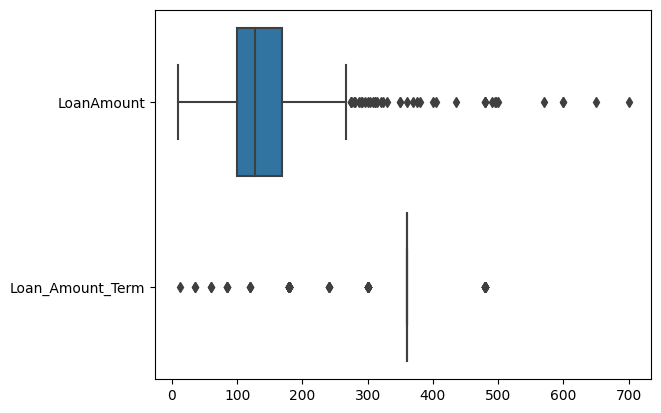

In [80]:
# And loan amounts
sns.boxplot(data = plot_df[['LoanAmount', 'Loan_Amount_Term']], orient = 'h')

Look at the distribution of income segregated  by `Education`

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Education'>

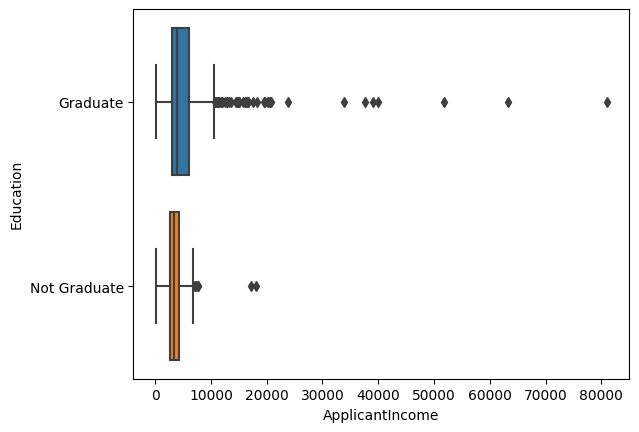

In [81]:
sns.boxplot(data = plot_df, x = 'ApplicantIncome', y='Education', orient='h')

Lots of 'outliers' in the Graduate group (more skewed distribution)

What about the distributions for only those whose loan status is rejected?

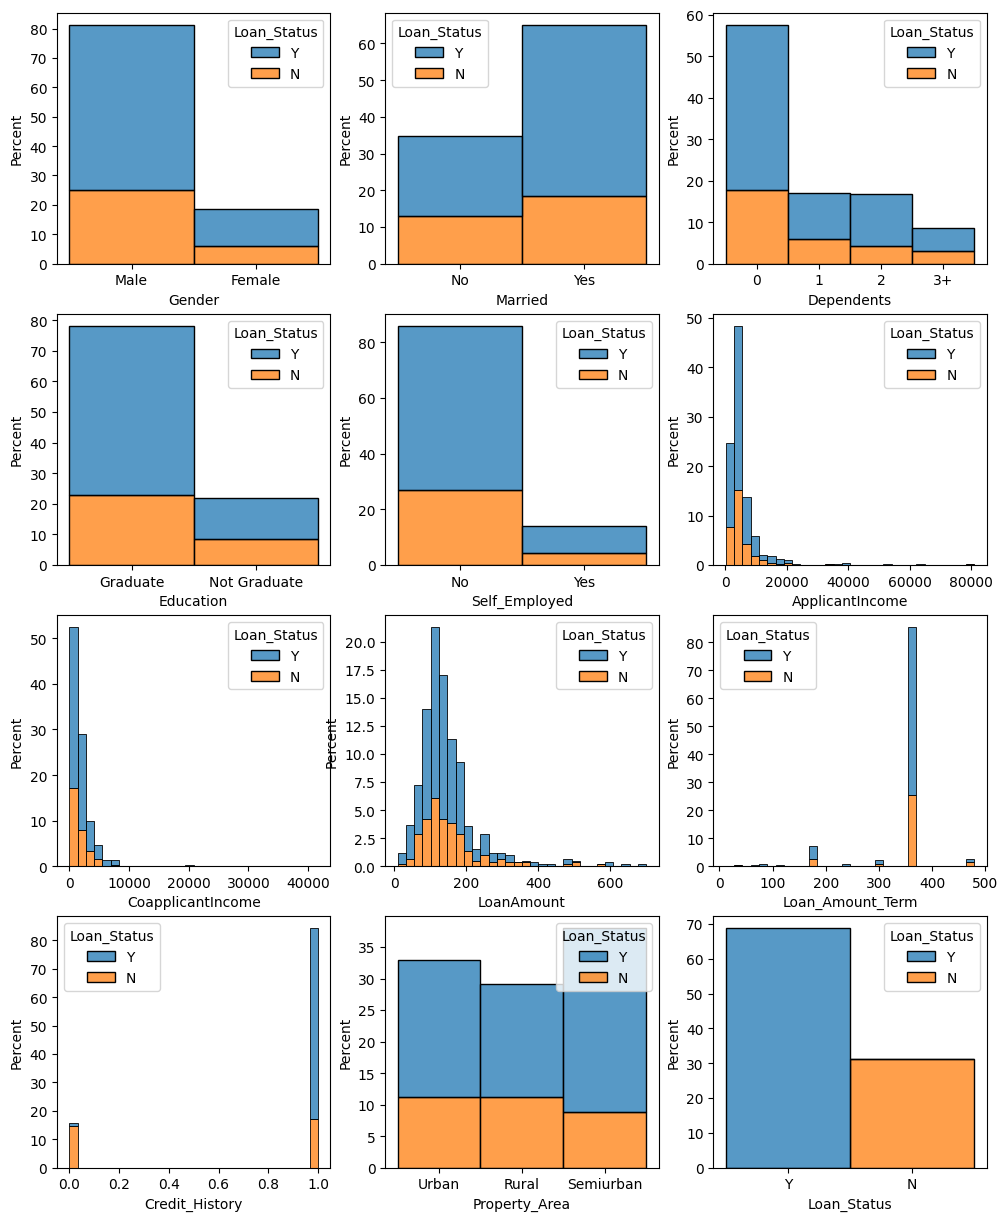

In [82]:
# plot_df = plot_df[plot_df["Loan_Status"] == 'N']

# Creating subplot axes

fig, axes = plt.subplots(4, 3, figsize=[12,15])

# Iterating through axes and names
for name, ax in zip(col_names, axes.flatten()):
    sns.histplot(x= name, data=plot_df,bins = 30, ax=ax, hue='Loan_Status', multiple="stack", stat='percent') 

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

- What would be interesting to look at? 

In [83]:
pd.pivot_table(df, index=['Education', 'Self_Employed'], columns = ['Loan_Status'], aggfunc=np.mean )

ApplicantIncome              CoapplicantIncome  \
Loan_Status                              N            Y                 N   
Education    Self_Employed                                                  
Graduate     No                6140.707965  5243.605072       1843.380531   
             Yes               6807.789474  8118.695652       1995.000000   
Not Graduate No                3489.136364  3436.074627       1269.136364   
             Yes               4108.571429  7365.900000       1307.571429   

                                        Credit_History            LoanAmount  \
Loan_Status                           Y              N         Y           N   
Education    Self_Employed                                                     
Graduate     No             1579.771449       0.574074  0.976471  160.412844   
             Yes            1518.347826       0.473684  1.000000  162.333333   
Not Graduate No             1348.268657       0.452381  0.982759  118.923077   
             Yes             620.800000       0.666667  1.000000  141.000000   

                                       Loan_Amount_Term              
Loan_Status                          Y                N           Y  
Education    Self_Employed                                           
Graduate     No             144.293680       355.090909  343.296703  
             Yes            190.386364       328.421053  341.866667  
Not Graduate No             113.615385       324.292683  335.076923  
             Yes            130.200000       334.285714  326.666667

**Thoughts**:  Higher income and credit history seem to be largest indicators (credit history especially; do the other ones even matter?). Being self-employed also seems to be a risk factor for not getting a loan (need to have a higher income to justify getting a loan)

In [84]:
pd.pivot_table(df, index=['Gender', 'Married' ], columns = ['Loan_Status'], aggfunc=np.mean )

ApplicantIncome              CoapplicantIncome               \
Loan_Status                  N            Y                 N            Y   
Gender Married                                                               
Female No          3955.482759  4815.568627       1767.379310   595.039216   
       Yes         4583.875000  4915.130435       1376.125000  1369.000000   
Male   No          5702.714286  4953.901235       1653.489796  1454.382716   
       Yes         5935.178218  5369.503906       2073.396040  1731.644219   

               Credit_History            LoanAmount              \
Loan_Status                 N         Y           N           Y   
Gender Married                                                    
Female No            0.571429  0.977778  123.964286  111.720000   
       Yes           0.500000  1.000000  145.250000  156.130435   
Male   No            0.622222  0.974359  142.413043  132.405063   
       Yes           0.505376  0.982833  165.446809  149.694779   

               Loan_Amount_Term              
Loan_Status                   N           Y  
Gender Married                               
Female No            348.428571  358.775510  
       Yes           360.000000  345.391304  
Male   No            353.250000  345.750000  
       Yes           336.123711  335.856574

Also seems that being male decreases likelihood of being approved for loan; unmarried males who are rejected for a loan have a mean income that is $18,000 higher than unmarried females, and that number is $14000 for married individuals. 

In [85]:
pd.pivot_table(df, index=['Gender', 'Dependents' ], columns = ['Loan_Status'], aggfunc=np.mean )

ApplicantIncome              CoapplicantIncome               \
Loan_Status                     N            Y                 N            Y   
Gender Dependents                                                               
Female 0              4159.038462  4335.425926        719.807692   879.648148   
       1              5129.500000  7114.846154          0.000000   409.076923   
       2              2402.500000  5028.000000        940.500000  1803.000000   
       3+             1123.000000  3083.000000      20833.500000     0.000000   
Male   0              5452.961538  4975.500000       1898.782051  1846.789556   
       1              6427.666667  5427.288462       2199.566667  1391.115385   
       2              4323.380952  5220.154930       1633.619048  1710.152113   
       3+             9406.187500  6789.344828       2222.187500   897.172414   

                  Credit_History            LoanAmount              \
Loan_Status                    N         Y           N           Y   
Gender Dependents                                                    
Female 0                0.500000  0.978261  115.769231  112.425926   
       1                0.833333  1.000000  137.500000  183.916667   
       2                1.000000  1.000000  152.500000  105.600000   
       3+               0.000000  1.000000  350.000000  255.000000   
Male   0                0.616438  0.987879  151.722222  139.760000   
       1                0.500000  0.978723  168.965517  148.620000   
       2                0.476190  0.984848  145.684211  155.385714   
       3+               0.466667  0.928571  189.666667  156.620690   

                  Loan_Amount_Term              
Loan_Status                      N           Y  
Gender Dependents                               
Female 0                362.400000  362.307692  
       1                306.000000  324.923077  
       2                360.000000  384.000000  
       3+               270.000000  360.000000  
Male   0                350.080000  340.525714  
       1                321.517241  340.384615  
       2                351.428571  333.633803  
       3+               320.000000  328.965517

Having dependents doesn't seem to matter. So are males just more likely to have poor credit history? Let's impute, turn categorical variables into numbers and see if any variables are correlated (we'll also need to transform the data for analysis.)

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)


Just a reminder of our missing values:

In [86]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Impute categorical variables (and a loan term) based on mode

In [87]:
# Remove individuals where unmarried is missing (only 3 individuals)
df = df.dropna(subset=['Married'])

# Imput with mode for other categorical variables (there is enough of difference between each value that this feels safe)
gend_mode = (df.Gender.mode().values)[0] # Want only the string value; hence the [0]
df['Gender'] = df['Gender'].fillna(gend_mode)


In [88]:
depen_mode = (df.Dependents.mode().values)[0] 
df['Dependents'] = df['Dependents'].fillna(depen_mode)

In [89]:
self_emp_mode = (df.Self_Employed.mode().values)[0] 
df['Self_Employed']= df['Self_Employed'].fillna(self_emp_mode)

In [90]:
educ_mode = (df.Education.mode().values)[0]
df['Education'] =df['Education'].fillna(educ_mode)

In [91]:
cred_hist_mode = (df.Credit_History.mode().values)[0]
df['Credit_History'] = df['Credit_History'].fillna(cred_hist_mode)

In [92]:
loan_term_mode = (df.Loan_Amount_Term.mode().values)[0]
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(loan_term_mode)

Since loan amount is quite skewed, we will impute based on the median.

In [93]:
df['LoanAmount'].fillna(df.LoanAmount.median(), inplace=True)

In [94]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,127.5,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

<AxesSubplot:xlabel='LogLoanAmount', ylabel='Count'>

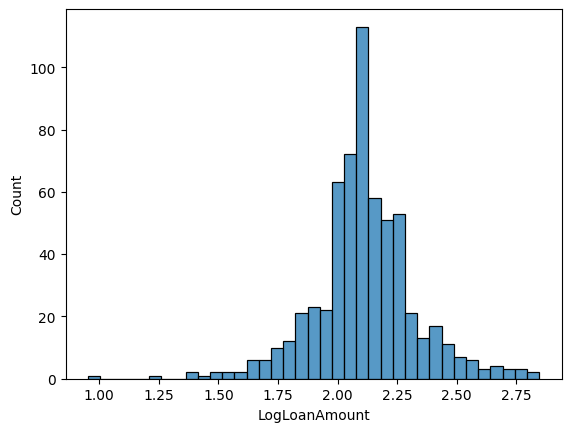

In [95]:
df['LogLoanAmount'] = np.log10(np.array(df.LoanAmount))
sns.histplot(data=df, x = 'LogLoanAmount')

wow, that was impressive.

Combine both incomes as total income and take a log transformation of the same.

<AxesSubplot:xlabel='LogTotalIncome', ylabel='Count'>

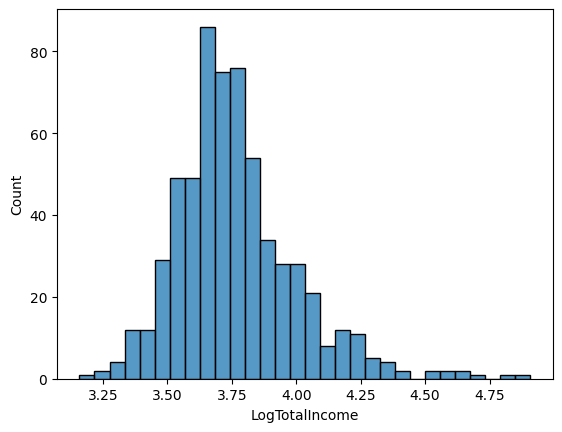

In [96]:

df['TotalIncome'] = df.ApplicantIncome + df.CoapplicantIncome 
df['LogTotalIncome'] = np.log10(np.array(df.TotalIncome))
sns.histplot(data=df, x = 'LogTotalIncome')

<AxesSubplot:xlabel='LoanIncomeRatio', ylabel='Count'>

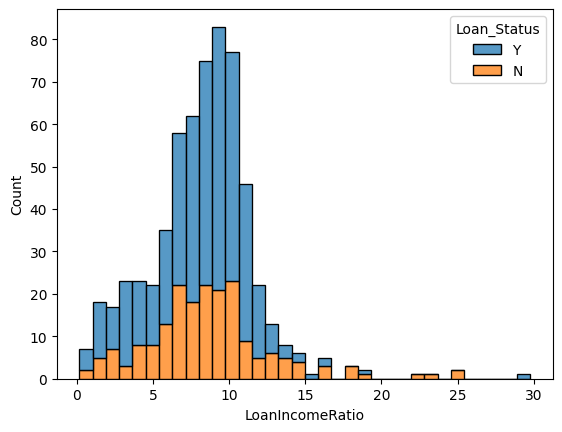

In [98]:

df['LoanIncomeRatio'] = (df.LoanAmount*df.Loan_Amount_Term)/df.TotalIncome
sns.histplot(data=df, x = 'LoanIncomeRatio', hue='Loan_Status', multiple='stack')

Loan-income ratio seems to play a role (more likely to be rejected the higher the ratio)

We're going to one-hot encode categorical variables, standardize the incomes, and see correlations.


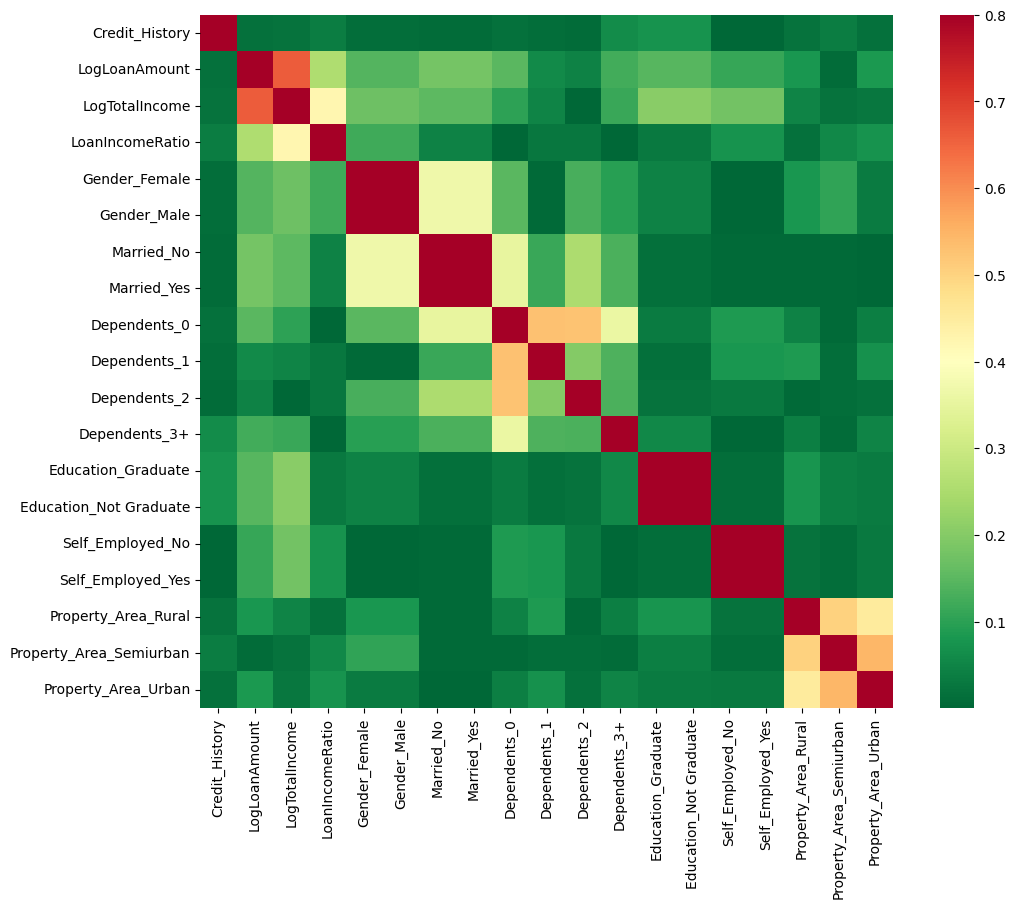

In [29]:
# Our label (needs some transforming):
y = df["Loan_Status"].copy()
y = y.map({'Y': 1, 'N': 0})

# Finalize our colummn and one-hot encode
transformed_df = df.drop(columns=['Loan_ID', 'Loan_Status', 'LoanAmount', 'Loan_Amount_Term', "ApplicantIncome", "CoapplicantIncome", "TotalIncome"])
transformed_df = pd.get_dummies(transformed_df)


corrmat = np.abs(transformed_df.corr())
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cmap="RdYlGn_r")
plt.show()

In [30]:
transformed_df

,Credit_History,LogLoanAmount,LogTotalIncome,LoanIncomeRatio,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,2.105510,3.767082,7.847495,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,1.0,2.107210,3.784689,7.565260,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,1.0,1.819544,3.477121,7.920000,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,1.0,2.079181,3.693815,8.743169,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,1.0,2.149219,3.778151,8.460000,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,1.851258,3.462398,8.813793,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0
610,1.0,1.602060,3.613419,1.753531,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0
611,1.0,2.403121,3.919706,10.957652,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
612,1.0,2.271842,3.879841,8.877753,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


So obviously there's a correlation between loan amount and income. I don't see any other obvious correlations...

## 4. Building a Predictive Model

Going to use a pipeline to  do some standardization and predict results

In [31]:
# Split the data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_df, y, test_size=0.25, random_state=42, stratify=y)

Stole the functions below from [here](https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py)

In [32]:
scores = ['precision', 'recall']

def print_dataframe(filtered_cv_results):
    """Pretty print for filtered dataframe"""
    for mean_precision, std_precision, mean_recall, std_recall, params in zip(
        filtered_cv_results["mean_test_precision"],
        filtered_cv_results["std_test_precision"],
        filtered_cv_results["mean_test_recall"],
        filtered_cv_results["std_test_recall"],
        filtered_cv_results["params"],
    ):
        print(
            f"precision: {mean_precision:0.3f} (±{std_precision:0.03f}),"
            f" recall: {mean_recall:0.3f} (±{std_recall:0.03f}),"
            f" for {params}"
        )
    print()


def refit_strategy(cv_results):
    """Define the strategy to select the best estimator.

    The strategy defined here is to filter-out all results below a precision threshold, 
    rank the remaining by recall and keep all models with one standard
    deviation of the best by recall. Once these models are selected, we can select the
    fastest model to predict.

    Parameters
    ----------
    cv_results : dict of numpy (masked) ndarrays
        CV results as returned by the `GridSearchCV`.

    Returns
    -------
    best_index : int
        The index of the best estimator as it appears in `cv_results`.
    """
    # print the info about the grid-search for the different scores
    precision_threshold = 0.775
    cv_results_ = pd.DataFrame(cv_results)
    print("All grid-search results:")
    print_dataframe(cv_results_)

    # Filter-out all results below the threshold
    high_precision_cv_results = cv_results_[
        cv_results_["mean_test_precision"] > precision_threshold
    ]

    print(f"Models with a precision higher than {precision_threshold}:")
    print_dataframe(high_precision_cv_results)

    high_precision_cv_results = high_precision_cv_results[
        [
            "mean_score_time",
            "mean_test_recall",
            "std_test_recall",
            "mean_test_precision",
            "std_test_precision",
            "rank_test_recall",
            "rank_test_precision",
            "params",
        ]
    ]

    # Select the most performant models in terms of recall
    # (within 1 sigma from the best)
    best_recall_std = high_precision_cv_results["mean_test_recall"].std()
    best_recall = high_precision_cv_results["mean_test_recall"].max()
    best_recall_threshold = best_recall - best_recall_std

    print(high_precision_cv_results["mean_test_recall"])
    print(best_recall_threshold)
    high_recall_cv_results = high_precision_cv_results[
        high_precision_cv_results["mean_test_recall"] > best_recall_threshold
    ]
    print(
        "Out of the previously selected high precision models, we keep all the\n"
        "the models within one standard deviation of the highest recall model:"
    )
    print_dataframe(high_recall_cv_results)

    # From the best candidates, select the fastest model to predict
    fastest_top_recall_high_precision_index = high_recall_cv_results[
        "mean_score_time"
    ].idxmin()

    print(
        "\nThe selected final model is the fastest to predict out of the previously\n"
        "selected subset of best models based on precision and recall.\n"
        "Its scoring time is:\n\n"
        f"{high_recall_cv_results.loc[fastest_top_recall_high_precision_index]}"
    )

    return fastest_top_recall_high_precision_index

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, StackingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb


scaling = Pipeline([('standard_scale', StandardScaler())])

preprocessing = ColumnTransformer( [ ('scales', scaling, ['LogLoanAmount', 'LogTotalIncome', 'LoanIncomeRatio']) ], remainder='passthrough' )

estimators = [('rf', RandomForestClassifier(class_weight='balanced')),
              ('logr', LogisticRegression(solver='saga', max_iter = 1500)),
              ('dtr', DecisionTreeClassifier(class_weight='balanced')), 
              ('svc', SVC()),
              ('xgb', xgb.XGBClassifier(eta=0.01)) 
]

clf = StackingClassifier(estimators=estimators, final_estimator = GradientBoostingClassifier() )

featureunion = FeatureUnion( [ ('pca', PCA()),
                               ('select_best', SelectKBest() )
                             ] )

pipe = Pipeline(steps=[('preprocess', preprocessing), 
                        ('featureunion', featureunion),
                         ('classifier', clf)   ])

# Find the best hyperparameters using GridSearchCV on the train set
param_grid = {'classifier__logr__max_iter': [50, 100],
              'classifier__xgb__max_depth': [10, 15,20],
              'classifier__xgb__colsample_bytree': [0.2, 0.5, 1],
              'classifier__xgb__max_delta_step':[1,2,5],
              'featureunion__pca__n_components': [3, 5],
              'featureunion__select_best__k': [3, 5]
            }

# grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, refit=refit_strategy)
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring = scores, refit=refit_strategy)
grid.fit(X_train, y_train)

# best_model = grid.best_estimator_
# best_hyperparams = grid.best_params_
# best_acc = grid.score(X_test, y_test)
# print(f'Best test set accuracy: {best_acc}\nAchieved with hyperparameters: {best_hyperparams}')


/home/marcjb/anaconda3/envs/lhl_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/marcjb/anaconda3/envs/lhl_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/marcjb/anaconda3/envs/lhl_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/marcjb/anaconda3/envs/lhl_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/marcjb/anaconda3/envs/lhl_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home

All grid-search results:
precision: 0.775 (±0.021), recall: 0.905 (±0.030), for {'classifier__logr__max_iter': 50, 'classifier__xgb__colsample_bytree': 0.2, 'classifier__xgb__max_delta_step': 1, 'classifier__xgb__max_depth': 10, 'featureunion__pca__n_components': 3, 'featureunion__select_best__k': 3}
precision: 0.782 (±0.017), recall: 0.892 (±0.037), for {'classifier__logr__max_iter': 50, 'classifier__xgb__colsample_bytree': 0.2, 'classifier__xgb__max_delta_step': 1, 'classifier__xgb__max_depth': 10, 'featureunion__pca__n_components': 3, 'featureunion__select_best__k': 5}
precision: 0.775 (±0.014), recall: 0.908 (±0.021), for {'classifier__logr__max_iter': 50, 'classifier__xgb__colsample_bytree': 0.2, 'classifier__xgb__max_delta_step': 1, 'classifier__xgb__max_depth': 10, 'featureunion__pca__n_components': 5, 'featureunion__select_best__k': 3}
precision: 0.788 (±0.035), recall: 0.917 (±0.044), for {'classifier__logr__max_iter': 50, 'classifier__xgb__colsample_bytree': 0.2, 'classifier_

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scales',
                                                                         Pipeline(steps=[('standard_scale',
                                                                                          StandardScaler())]),
                                                                         ['LogLoanAmount',
                                                                          'LogTotalIncome',
                                                                          'LoanIncomeRatio'])])),
                                       ('featureunion',
                                        FeatureUnion(transformer_list=[('pca',
                                                                        PCA()),
                                              

In [ ]:
# ## Do some additional evaluation here, I guess
# # Plot the PCA spectrum
# pca.fit(X_train)

# fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
# ax0.plot(
#     np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "+", linewidth=2
# )
# ax0.set_ylabel("PCA explained variance ratio")

# ax0.axvline(
#     grid.best_estimator_.named_steps["pca"].n_components,
#     linestyle=":",
#     label="n_components chosen",
# )   

Try paramater grid search to improve the results

In [101]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


y_pred = grid.predict(X_test)

conf = confusion_matrix(y_test, y_pred)

print(conf)

clf_report = classification_report(y_test, y_pred)
print(clf_report)

probs = grid.predict_proba(X_test)
print(f'ROC-AUC score is {roc_auc_score(y_test, y_pred)}.')



[[36 12]
 [ 6 99]]
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        48
           1       0.89      0.94      0.92       105

    accuracy                           0.88       153
   macro avg       0.87      0.85      0.86       153
weighted avg       0.88      0.88      0.88       153

ROC-AUC score is 0.8464285714285714.


In [103]:
grid.best_params_

{'classifier__logr__max_iter': 100,
 'classifier__xgb__colsample_bytree': 1,
 'classifier__xgb__max_delta_step': 5,
 'classifier__xgb__max_depth': 10,
 'featureunion__pca__n_components': 3,
 'featureunion__select_best__k': 3}

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [ ]:
# Did some of the transformations beforehand (one-hot encode, logarithm) so I could inspect data; could add it to pipeline here
# own class that can be inserted to pipeline as any other sklearn object.

In [ ]:
main_pipeline = Pipeline([
    ("features", all_features),
    ("rf", rf)
])

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

Run the file 'src/app.py' before using these cells; once we run that file, we can see the result of our predictions here

In [62]:
# Get some data
# Here, we select a given row from the original dataframe
def loan_check(number):
    '''Returns a dictionary of the data of the given individual. Number chosen must
    be less than the length of our original test data
    Parameters:
        number: Number that tells us the individual's data we want to look at
    Return:
        json_data: dictionayr with the features of the given individual'''
    num_ind = transformed_df.shape[0]
    if number > num_ind: 
        print(f"Number outside of bounds; pick a number less than {num_ind}.")
    else:
        json_data = (transformed_df.loc[number,:]).to_dict()
    return json_data

In [69]:
import requests

URL = "http://127.0.0.1:5000/prediction"
# sending get request and saving the response as response object 
json_data = loan_check(103)
r = requests.post(url = URL, json = json_data) 

In [70]:
proba = r.json()
print(f'The probability of loan approval for this individual is {proba[0][1]*100:.1f}%.')

The probability of loan approval for this individual is 96.5%.
